In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Defining Charting Functions

In [53]:
def draw_candle_chart(sample_df, lines, region=None):
    #create figure
    f = plt.figure()
#     f.set_figWidth(15)
#     f.set_figWidth(10)

        
    #define width of candlestick elements
    width = .4
    width2 = .05

    #define up and down prices
    up = sample_df[sample_df.Close>=sample_df.Open]
    down = sample_df[sample_df.Close<sample_df.Open]
    
    #define colors to use
    col1 = 'green'
    col2 = 'red'

    #plot up prices
    plt.bar(up.index,up.Close-up.Open,width,bottom=up.Open,color=col1)
    plt.bar(up.index,up.High-up.Close,width2,bottom=up.Close,color=col1)
    plt.bar(up.index,up.Low-up.Open,width2,bottom=up.Open,color=col1)

    #plot down prices
    plt.bar(down.index,down.Close-down.Open,width,bottom=down.Open,color=col2)
    plt.bar(down.index,down.High-down.Open,width2,bottom=down.Open,color=col2)
    plt.bar(down.index,down.Low-down.Close,width2,bottom=down.Close,color=col2)

    #rotate x-axis tick labels
    plt.xticks(rotation=45, ha='right')
    
    for x in lines:
        plt.hlines(x, xmin = sample_df.index[0], xmax = sample_df.index[-1])
        if region is not None:
            plt.fill_between(sample_df.index, x-x*region, x+x*region, alpha = 0.4)

    #display candlestick chart
    plt.show()

In [44]:
def draw_line_chart(sample_df, lines, region=None, magv=None):
    #create figure
    f = plt.figure()
    f.set_figWidth(15)
    f.set_figWidth(10)
    
    #if mavg is not None:
    
    plt.plot(sample_df.index, sample_df.Close)
    
    
    #rotate x-axis tick labels
    plt.xticks(rotation=45, ha='right')
    
    for x in lines:
        plt.hlines(x, xmin = sample_df.index[0], xmax = sample_df.index[-1])
        if region is not None:
            plt.fill_between(sample_df.index, x-x*region, x+x*region, alpha = 0.4)
    #display candlestick chart
    plt.show()

# Loading Data

In [16]:
data = pd.read_csv("BTC-USD_1h_6d.csv",
                  usecols= [0,1,2,3,4])
data["Date"] = pd.to_datetime(data["Date"])

In [19]:
print(data)

                         Date          Open          High           Low  \
0   2023-02-25 00:00:00+00:00  23197.087891  23210.210938  23152.423828   
1   2023-02-25 01:00:00+00:00  23167.687500  23206.890625  23159.476562   
2   2023-02-25 02:00:00+00:00  23199.054688  23207.302734  23098.121094   
3   2023-02-25 03:00:00+00:00  23106.859375  23128.851562  23093.617188   
4   2023-02-25 04:00:00+00:00  23109.886719  23122.630859  23082.904297   
..                        ...           ...           ...           ...   
149 2023-03-03 05:00:00+00:00  22400.986328  22424.228516  22362.820312   
150 2023-03-03 06:00:00+00:00  22367.369141  22415.994141  22360.468750   
151 2023-03-03 07:00:00+00:00  22399.292969  22412.218750  22362.826172   
152 2023-03-03 08:00:00+00:00  22381.136719  22434.169922  22381.136719   
153 2023-03-03 09:00:00+00:00  22433.345703  22450.306641  22399.406250   

            Close  
0    23165.320312  
1    23204.515625  
2    23104.314453  
3    23108.359375  


# Generate data assets


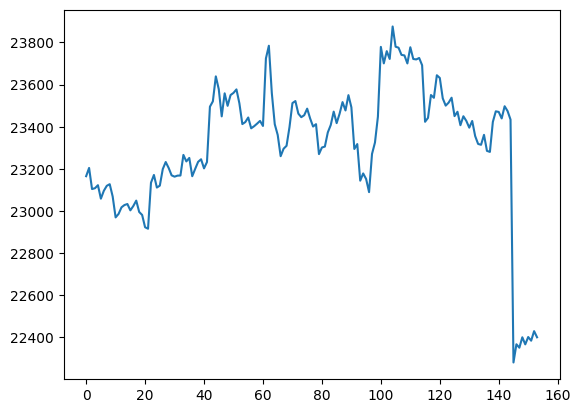

In [22]:
sample_df = data
sample = data['Close'].to_numpy().flatten()
sample_original = sample.copy()

plt.plot(sample_df.index, sample_df.Close)

# Grab Turning Points


In [24]:
from scipy.signal import argrelextrema

maxima = argrelextrema(sample, np.greater)
minima = argrelextrema(sample, np.less)

extrema = np.concatenate((maxima, minima), axis=1)[0]
extrema_prices = np.concatenate((sample[maxima], sample[minima]))

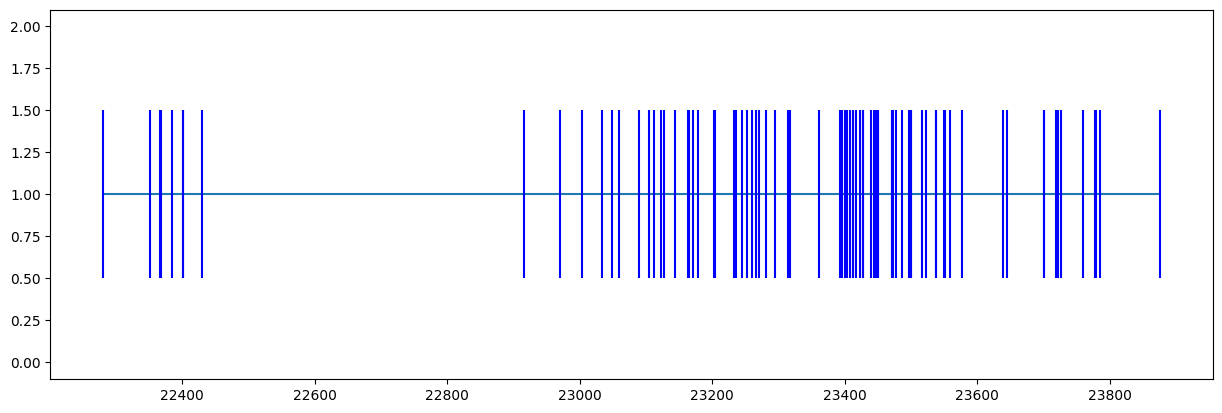

In [29]:
f = plt.figure()
f.set_figwidth(15)
plt.hlines(1,sample_original.min(),sample_original.max())
plt.eventplot(extrema_prices, orientation='horizontal', colors='b')
plt.show()

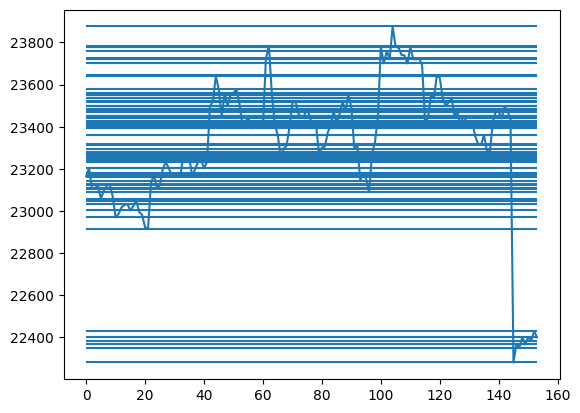

In [30]:
plt.plot(sample_df.index, sample_df.Close)
for x in extrema_prices:
    plt.hlines(x, xmin=sample_df.index[0], xmax=sample_df.index[-1])

# Estimate PDF

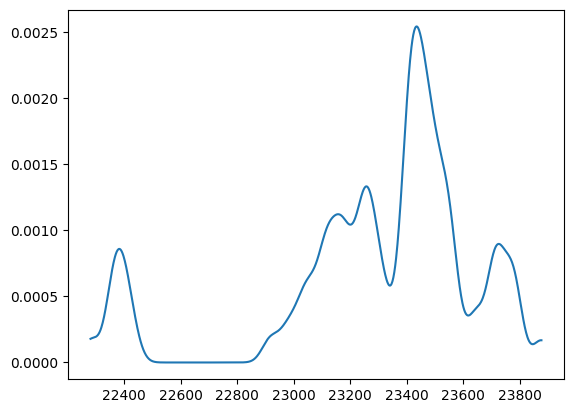

In [38]:
from sklearn.neighbors import KernelDensity

initial_price = extrema_prices[0]

kde = KernelDensity(kernel='gaussian', bandwidth=initial_price/800).fit(extrema_prices.reshape(-1,1))

a, b = min(extrema_prices), max(extrema_prices)
price_range = np.linspace(a, b, 1000).reshape(-1,1)
pdf = np.exp(kde.score_samples(price_range))
plt.plot(price_range, pdf)

In [40]:
from scipy.signal import find_peaks

peaks = find_peaks(pdf)[0]

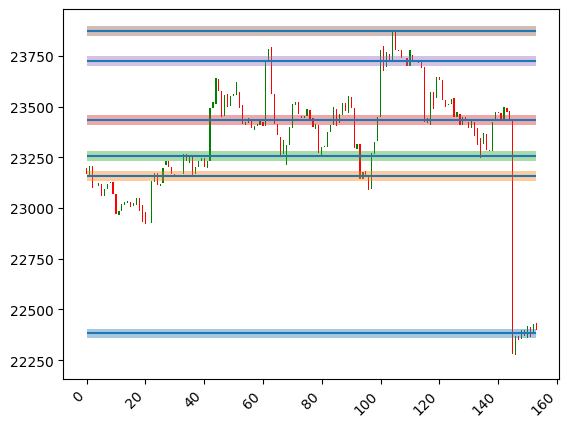

In [56]:
draw_candle_chart(sample_df, price_range[peaks], region=0.001)